# ELEC 872 Project

- Dustin Pulver 20106164 
- Dean Sacoransky 20112296


All Libraries used in this assignment are displayed in the cell below. Running the below cell should be all the is required to properly install these libraries into this environment.


The github https://github.com/RossiAlessio/MMASH will need to be cloned to your local setup. The helper fucniton create_dataset was used from this github. Next you will need to visit https://physionet.org/content/mmash/1.0.0/ to download the dataset which can be found at the bottom on the webpage. Once the zip is extracted uou will get a folder named DataPaper.The path in the helper fucniton '/content/gdrive/MyDrive/872-Project/DataPaper/' will need to be reaplacede with your local path to the folder DataPaper. This path also appears in a few cells below just before displaying the users, you will need to replace this path with your local path. 


#Imports and Helper Funcitons 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.8 MB/s 


In [ ]:
import os
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from pprint import pprint
from sklearn import tree, svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from xgboost.sklearn import XGBClassifier
from numpy.linalg import norm
from sklearn.preprocessing import MinMaxScaler
import glob
import datetime 
from datetime import datetime
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from sklearn.ensemble import AdaBoostClassifier
from skopt.space import Real, Categorical, Integer

In [ ]:
path = '/content/gdrive/MyDrive/872-Project/DataPaper/'

In [ ]:
users = os.listdir(path)[:-1] #access user folders directory 
users

['user_12',
 'user_2',
 'user_22',
 'user_15',
 'user_1',
 'user_13',
 'user_3',
 'user_5',
 'user_4',
 'user_14',
 'user_11',
 'user_7',
 'user_17',
 'user_21',
 'user_6',
 'user_16',
 'user_10',
 'user_19',
 'user_8',
 'user_9',
 'user_18']

In [ ]:
def create_dataset(users,file_name,replace_na=True):
    """
    Returns MMASH datafarame.
    Parameters
    ---------
    nn_intervals : list
        List of Normal to Normal Interval.
    Returns
    ---------
    nni_tmstp : list
        list of time intervals between first NN-interval and final NN-interval.
    """
    import pandas
    import numpy
    
    df_concat = pandas.DataFrame()
    for user in users:
        try:
            df = pandas.read_csv('/content/gdrive/MyDrive/872-Project/DataPaper/%s/%s.csv'%(user,file_name))
            df['user'] = user
            df_concat = pandas.concat([df_concat,df])
        except:
            print('NO data for %s'%user)
            pass
    
    del df_concat['Unnamed: 0']
    df_concat = df_concat.set_index('user')

    if replace_na == True:
        df_concat = df_concat.replace(0,numpy.nan)

    return(df_concat)

In [ ]:
user_info = create_dataset(users,'user_info')
user_info

,Gender,Weight,Height,Age
user,,,,
user_12,M,67,170,27.0
user_2,M,95,183,27.0
user_22,M,92,205,32.0
user_15,M,80,180,24.0
user_1,M,65,169,29.0
user_13,M,74,180,25.0
user_3,M,70,174,34.0
user_5,M,80,196,25.0
user_4,M,76,180,27.0


# Actigraph

Actigraph info is a good description of daily activity. Can be used as input to predict sleep quality, psych characteristics

In [ ]:
actigraph = create_dataset(users,'Actigraph')
actigraph 

,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,day,time
user,,,,,,,,,,,,
user_12,190.0,87.0,144.0,NaN,73.0,NaN,1.0,NaN,NaN,253.78,1,09:26:09
user_12,41.0,149.0,108.0,1.0,73.0,NaN,1.0,NaN,NaN,188.54,1,09:26:10
user_12,19.0,176.0,54.0,1.0,74.0,NaN,1.0,NaN,NaN,185.08,1,09:26:11
user_12,189.0,261.0,150.0,1.0,74.0,NaN,1.0,NaN,NaN,355.45,1,09:26:12
user_12,185.0,371.0,109.0,NaN,74.0,NaN,1.0,NaN,NaN,428.66,1,09:26:13
...,...,...,...,...,...,...,...,...,...,...,...,...
user_18,NaN,NaN,NaN,NaN,87.0,NaN,NaN,NaN,1.0,NaN,2,09:18:34
user_18,NaN,NaN,NaN,NaN,87.0,NaN,NaN,NaN,1.0,NaN,2,09:18:35
user_18,NaN,NaN,NaN,NaN,87.0,NaN,NaN,NaN,1.0,NaN,2,09:18:36


# Sleep


In [ ]:
# what paper used

# time when they went to bed 
# time got out of bed 
# the time to fall asleep 
# the time needed to fall asleep 
# total sleeping time 
# time in bed 
# Ratio between total sleep and total in-bed time 
# time spent awake after falling asleep for the frist time 
# the number of awakenings
# awakening in minutes
# time without/with movements
# ratio between movement and fragmentation indices

In [ ]:
sleep  = create_dataset(users,'sleep')
sleep

# TST = sleep['Total Sleep Time (TST)']
# TST= TST.drop(index=['user_21'])

,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time,Onset Date,Onset Time,Latency,Efficiency,Total Minutes in Bed,Total Sleep Time (TST),Wake After Sleep Onset (WASO),Number of Awakenings,Average Awakening Length,Movement Index,Fragmentation Index,Sleep Fragmentation Index
user,,,,,,,,,,,,,,,,
user_12,2,00:32,2,06:36,2,00:32,NaN,94.23,364,343,21,12,1.75,9.066,15.385,24.451
user_2,2,00:50,2,06:22,2,00:54,4.0,73.49,332,244,84,18,4.67,15.060,5.556,20.616
user_22,2,01:06,2,07:04,2,01:09,3.0,84.92,358,304,51,21,2.43,14.804,13.636,28.440
user_15,2,01:15,2,05:39,2,01:16,1.0,89.39,264,236,27,15,1.80,18.561,NaN,18.561
user_1,2,00:46,2,03:31,2,00:46,NaN,87.27,165,144,21,9,2.33,9.091,10.000,19.091
user_1,2,03:57,2,07:30,2,03:57,NaN,92.02,213,196,17,9,1.89,8.920,NaN,8.920
user_13,1,23:41,1,05:04,1,23:41,NaN,76.47,323,247,76,19,4.00,17.957,15.789,33.746
user_3,1,22:29,1,05:52,1,22:32,3.0,79.23,443,351,89,16,5.56,18.962,NaN,18.962
user_5,1,23:56,1,06:42,1,23:56,NaN,85.71,406,348,58,21,2.76,11.576,9.524,21.100


# Survey (PSQ)

In [ ]:
survey = create_dataset(users,'questionnaire')
survey

,MEQ,STAI1,STAI2,Pittsburgh,Daily_stress,BISBAS_bis,BISBAS_reward,BISBAS_drive,BISBAS_fun,panas_pos_10,panas_pos_14,panas_pos_18,panas_pos_22,panas_pos_9+1,panas_neg_10,panas_neg_14,panas_neg_18,panas_neg_22,panas_neg_9+1
user,,,,,,,,,,,,,,,,,,,
user_12,50.0,27.0,33.0,4.0,48.0,20.0,22.0,10.0,8.0,30.0,27.0,30.0,20.0,29.0,14.0,16.0,14.0,23.0,13.0
user_2,52.0,24.0,39.0,7.0,26.0,26.0,21.0,12.0,6.0,37.0,32.0,24.0,27.0,33.0,11.0,10.0,16.0,17.0,18.0
user_22,52.0,41.0,48.0,5.0,41.0,24.0,21.0,9.0,11.0,24.0,29.0,25.0,22.0,20.0,24.0,15.0,18.0,13.0,13.0
user_15,58.0,52.0,42.0,5.0,35.0,25.0,25.0,16.0,16.0,28.0,29.0,36.0,18.0,22.0,12.0,19.0,22.0,15.0,11.0
user_1,47.0,41.0,43.0,5.0,23.0,22.0,21.0,14.0,14.0,21.0,17.0,12.0,18.0,17.0,11.0,13.0,13.0,10.0,10.0
user_13,48.0,30.0,43.0,4.0,27.0,22.0,19.0,14.0,12.0,22.0,NaN,26.0,14.0,23.0,13.0,NaN,11.0,13.0,12.0
user_3,59.0,27.0,27.0,8.0,11.0,19.0,18.0,12.0,6.0,35.0,34.0,31.0,28.0,35.0,11.0,12.0,11.0,12.0,11.0
user_5,52.0,54.0,47.0,8.0,41.0,25.0,23.0,14.0,15.0,30.0,25.0,31.0,27.0,31.0,26.0,17.0,17.0,15.0,16.0
user_4,60.0,28.0,40.0,4.0,10.0,20.0,17.0,13.0,14.0,30.0,27.0,22.0,19.0,26.0,11.0,13.0,15.0,14.0,14.0


In [ ]:
PSQ = survey[['Pittsburgh']]
PSQ.columns = ['PSQ']
PSQ

,PSQ
user,
user_12,4.0
user_2,7.0
user_22,5.0
user_15,5.0
user_1,5.0
user_13,4.0
user_3,8.0
user_5,8.0
user_4,4.0


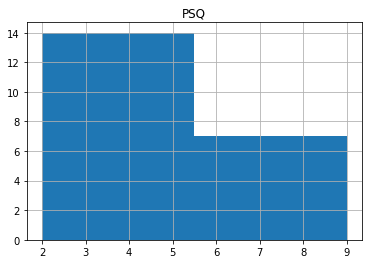

In [ ]:
hist = PSQ.hist(bins=2)

# Activity

In [ ]:
activity = create_dataset(users,'Activity')

In [ ]:
activity

,Activity,Start,End,Day
user,,,,
user_12,3.0,10:00,10:20,1
user_12,7.0,11:05,11:30,1
user_12,8.0,11:30,12:10,1
user_12,3.0,12:10,12:35,1
user_12,8.0,12:35,13:05,1
...,...,...,...,...
user_18,11.0,20:00,21:00,1
user_18,9.0,07:45,08:00,2
user_18,12.0,00:15,00:30,2


In [ ]:
activity['Activity'].value_counts()

3.0     84
6.0     84
2.0     76
7.0     39
9.0     32
12.0    27
8.0     16
10.0    13
1.0     12
5.0     10
4.0      7
11.0     5
Name: Activity, dtype: int64

# Pre-Processing

In [ ]:
# values lower than 6 indicate good sleep quality
# [output if condition else output for l in list]

binary = []
for index, row in PSQ.iterrows():
  if row['PSQ'] < 6:
    binary.append(1)
  else:
     binary.append(0)

PSQ['PSQ'] = binary

PSQ

,PSQ
user,
user_12,1
user_2,0
user_22,1
user_15,1
user_1,1
user_13,1
user_3,0
user_5,0
user_4,1


In [ ]:
activity = activity[activity['End'].notna()]
activity = activity[activity['Activity'].notna()]
activity['End'].mask(activity['End'] == '24:00', '00:00', inplace=True)
activity['Start'] =  pd.to_datetime(activity['Start'], format='%H:%M')
activity['End'] =  pd.to_datetime(activity['End'], format='%H:%M')
activity['End'] = activity['End'].dt.time
activity['Start'] = activity['Start'].dt.time

In [ ]:
activity['time_spent'] = ''
times = []
for index, row in activity.iterrows():
  end = row['End']
  start = row['Start']
  time = datetime.combine(date.today(),end) - datetime.combine(date.today(),start)  
  time_sec = time.total_seconds()
  if (time_sec < 0):
   time_sec =  time_sec + 86400
  times.append(time_sec)

activity['time_spent'] = times

In [ ]:
u1 = activity.loc['user_1']
u2 = activity.loc['user_2']
u3 = activity.loc['user_3']
u4 = activity.loc['user_4']
u5 = activity.loc['user_5']
u6 = activity.loc['user_6']
u7 = activity.loc['user_7']
u8 = activity.loc['user_8']
u9 = activity.loc['user_9']
u10 = activity.loc['user_10']
u11 = activity.loc['user_11']
u12 = activity.loc['user_12']
u13 = activity.loc['user_13']
u14 = activity.loc['user_14']
u15 = activity.loc['user_15']
u16 = activity.loc['user_16']
u17 = activity.loc['user_17']
u18 = activity.loc['user_18']
u19 = activity.loc['user_19']
u21 = activity.loc['user_21']
u22 = activity.loc['user_22']

users_list = [u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13,u14,u15,u16,u17,u18,u19,u21,u22]

In [ ]:
avg = []
for i in users_list:
  avg.append(len(i.index))
print(sum(avg)/len(avg))

19.285714285714285


In [ ]:
total_activity = pd.DataFrame()

for i in users_list:
  count = 0
  activites = {}
  for index, row in i.iterrows():
      if count == 0:
        activites['User'] = index
      count = count + 1
      temp = row['Activity']
      if(temp in activites ):
          current = activites[temp] 
          temp1 = row['time_spent']
          seconds = temp1
          added = current + seconds
          activites[temp] = added
      else:
        temp1 = row['time_spent']
        seconds = temp1
        activites[temp] = seconds
  total_activity = total_activity.append(activites, ignore_index=True)

In [ ]:
total_activity = total_activity.set_index('User')

In [ ]:
# 1 sleep 
# 2 laying down 
# 3 sitting (studying, eatting , etc) 
# 4 light movement (slow walking, work, etc) 
# 5 medium movement ( fast wlak, bike) 
# 6 heavy movement ( gym, running) 
# 7 eatting 
# 8 small screen usage ( phone or computer0 
# 9 large screen usage ( TV) 
# 10 caffeinated drink consumption 
# 11 smoking 
# 12 alcohol 

In [ ]:
total_activity = total_activity.fillna(0)
total_activity

,2.0,9.0,10.0,6.0,7.0,4.0,3.0,5.0,8.0,1.0,12.0,11.0
User,,,,,,,,,,,,
user_1,15420.0,780.0,3000.0,7800.0,3600.0,600.0,3900.0,600.0,2700.0,300.0,0.0,0.0
user_2,2640.0,120.0,0.0,3120.0,9600.0,1020.0,6060.0,0.0,1800.0,720.0,1200.0,0.0
user_3,9720.0,1200.0,0.0,3300.0,1500.0,1200.0,21660.0,3300.0,2400.0,2700.0,0.0,0.0
user_4,10500.0,600.0,0.0,6600.0,14100.0,0.0,0.0,0.0,7200.0,60.0,600.0,0.0
user_5,18000.0,1200.0,0.0,7200.0,8100.0,0.0,3000.0,0.0,0.0,0.0,0.0,0.0
user_6,12780.0,120.0,0.0,5700.0,10020.0,0.0,5760.0,900.0,10440.0,0.0,0.0,0.0
user_7,9300.0,0.0,0.0,10800.0,0.0,0.0,21900.0,0.0,7200.0,0.0,600.0,0.0
user_8,174600.0,2400.0,0.0,4800.0,0.0,0.0,22200.0,4500.0,3300.0,0.0,600.0,0.0
user_9,600.0,0.0,0.0,7200.0,21600.0,0.0,80400.0,3600.0,5400.0,600.0,1200.0,0.0


In [ ]:
total_activity[total_activity.columns[1:]].var()

9.0     9.253714e+05
10.0    4.800000e+05
6.0     4.054783e+06
7.0     1.041914e+08
4.0     3.651429e+05
3.0     3.115198e+08
5.0     4.328143e+06
8.0     1.063745e+07
1.0     1.772383e+06
12.0    4.612800e+05
11.0    7.349829e+05
dtype: float64

In [ ]:
var = total_activity[10.0].var()
var

480000.0

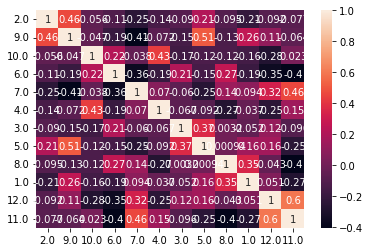

In [ ]:
sns.heatmap(total_activity.corr(), annot=True)

Alcohol(12) and smoking(11) have strong correlation.

Medium movement(5) and large screen usage(9) have moderate correlation

Laying down(2) and large screen usage(9) have moderate correlation

light movement(4) and caffeinated drink consumption (10) have moderate correlation


In [ ]:
activity_PSQ = total_activity.join(PSQ)
activity_PSQ

,2.0,9.0,10.0,6.0,7.0,4.0,3.0,5.0,8.0,1.0,12.0,11.0,PSQ
User,,,,,,,,,,,,,
user_1,15420.0,780.0,3000.0,7800.0,3600.0,600.0,3900.0,600.0,2700.0,300.0,0.0,0.0,1
user_2,2640.0,120.0,0.0,3120.0,9600.0,1020.0,6060.0,0.0,1800.0,720.0,1200.0,0.0,0
user_3,9720.0,1200.0,0.0,3300.0,1500.0,1200.0,21660.0,3300.0,2400.0,2700.0,0.0,0.0,0
user_4,10500.0,600.0,0.0,6600.0,14100.0,0.0,0.0,0.0,7200.0,60.0,600.0,0.0,1
user_5,18000.0,1200.0,0.0,7200.0,8100.0,0.0,3000.0,0.0,0.0,0.0,0.0,0.0,0
user_6,12780.0,120.0,0.0,5700.0,10020.0,0.0,5760.0,900.0,10440.0,0.0,0.0,0.0,0
user_7,9300.0,0.0,0.0,10800.0,0.0,0.0,21900.0,0.0,7200.0,0.0,600.0,0.0,0
user_8,174600.0,2400.0,0.0,4800.0,0.0,0.0,22200.0,4500.0,3300.0,0.0,600.0,0.0,1
user_9,600.0,0.0,0.0,7200.0,21600.0,0.0,80400.0,3600.0,5400.0,600.0,1200.0,0.0,0


In [ ]:
activity_PSQ[activity_PSQ.columns[1:]].corr()['PSQ'][:]

9.0     0.350785
10.0    0.209165
6.0    -0.123370
7.0     0.063075
4.0    -0.082223
3.0    -0.283495
5.0     0.054730
8.0    -0.139642
1.0     0.181936
12.0    0.030481
11.0    0.118323
PSQ     1.000000
Name: PSQ, dtype: float64

# Model training and tetsig

In [ ]:
X = activity_PSQ.drop(columns=['PSQ'])
y = activity_PSQ['PSQ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## feature importnace

[0.07352155 0.20761003 0.         0.09992662 0.0939341  0.
 0.09890941 0.12896118 0.13807729 0.         0.15905981 0.        ]
                        0
Activity ID              
Sleeping         0.073522
Laying Down      0.207610
Sitting          0.000000
Light Movement   0.099927
Medium Movement  0.093934
Heavy Movement   0.000000
Eatting          0.098909
Small Screen     0.128961
Large Screen     0.138077
Caffeine         0.159060
Alcohol          0.000000


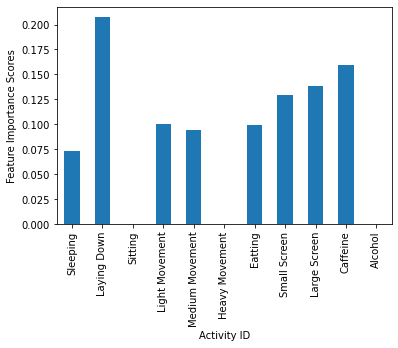

In [ ]:
from matplotlib import pyplot

model_1 = XGBClassifier(objective='binary:logistic', seed=1)
model_1.fit(X,y)
print(model_1.feature_importances_)
x = model_1.feature_importances_[:-1]
x[10], x[9] = x[9], x[10]
xi = ['Sleeping', 'Laying Down', 'Sitting', 'Light Movement','Medium Movement','Heavy Movement','Eatting', 'Small Screen', 'Large Screen', 'Caffeine', 'Alcohol']

df = pd.DataFrame(x)
df['Activity ID'] = xi
df = df.set_index('Activity ID')
print(df)
df.plot(kind='bar', legend = None)
plt.ylabel("Feature Importance Scores")
plt.xticks(rotation=90)
plt.show()

# pyplot.xticks(xi)
# pyplot.bar(range(len(x)), x)
# pyplot.show()

## Start of training

In [ ]:
# LogisticRegressionTUNING WITH CV = 5 PCA

full_pipline = Pipeline(
    steps=[
        ('pca', PCA(n_components = 0.9)),
        ('my_classifier', LogisticRegression(C = 1,penalty = 'l1',solver = 'liblinear'))]) # solver = liblinear best for small datasets look at documentation

param_grid = {
    'my_classifier__C': Real(0.2,1),
    'my_classifier__penalty': Categorical(['l2','l1']),
    'pca__n_components':Real(0.75,0.95)
}

bayes_search_5 = BayesSearchCV(
     full_pipline,param_grid, cv=5, verbose=3, n_jobs=1,n_iter=50, 
     scoring='f1',return_train_score=True)

bayes_search_5.fit(X_train, y_train)

print('best score {}'.format(bayes_search_5.best_score_))
print('best score {}'.format(bayes_search_5.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END my_classifier__C=0.8169006492691391, my_classifier__penalty=l2, pca__n_components=0.8467477161965998;, score=(train=0.500, test=0.000) total time=   0.0s
[CV 2/5] END my_classifier__C=0.8169006492691391, my_classifier__penalty=l2, pca__n_components=0.8467477161965998;, score=(train=0.500, test=0.000) total time=   0.0s
[CV 3/5] END my_classifier__C=0.8169006492691391, my_classifier__penalty=l2, pca__n_components=0.8467477161965998;, score=(train=0.600, test=0.667) total time=   0.0s
[CV 4/5] END my_classifier__C=0.8169006492691391, my_classifier__penalty=l2, pca__n_components=0.8467477161965998;, score=(train=0.824, test=0.667) total time=   0.0s
[CV 5/5] END my_classifier__C=0.8169006492691391, my_classifier__penalty=l2, pca__n_components=0.8467477161965998;, score=(train=0.824, test=0.667) total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END my_classifier__C=0.970854226767788

In [ ]:
y_score = bayes_search_5.score(X_test,y_test)
y_score

0.6666666666666666

In [ ]:
# LogisticRegression TUNING WITH CV = 5 NOPCA
full_pipline = Pipeline(
    steps=[
        ('my_classifier', LogisticRegression(C = 1,penalty = 'l1',solver = 'liblinear'))]) # solver = liblinear best for small datasets look at documentation

param_grid = {
    'my_classifier__C': Real(0.2,1),
    'my_classifier__penalty': Categorical(['l2','l1']),
}

bayes_search_5_NOPCA = BayesSearchCV(
     full_pipline,param_grid, cv=5, verbose=3, n_jobs=1,n_iter=50, 
     scoring='f1',return_train_score=True)

bayes_search_5_NOPCA.fit(X_train, y_train)

print('best score {}'.format(bayes_search_5_NOPCA.best_score_))
print('best score {}'.format(bayes_search_5_NOPCA.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END my_classifier__C=0.2926691999906146, my_classifier__penalty=l2;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 2/5] END my_classifier__C=0.2926691999906146, my_classifier__penalty=l2;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 3/5] END my_classifier__C=0.2926691999906146, my_classifier__penalty=l2;, score=(train=1.000, test=0.667) total time=   0.0s
[CV 4/5] END my_classifier__C=0.2926691999906146, my_classifier__penalty=l2;, score=(train=1.000, test=0.667) total time=   0.0s
[CV 5/5] END my_classifier__C=0.2926691999906146, my_classifier__penalty=l2;, score=(train=1.000, test=0.000) total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END my_classifier__C=0.7888014499015874, my_classifier__penalty=l1;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END my_classifier__C=0.7888014499015874, my_classifier__penalty=l1;, score=(train=1.000, test=0.500

In [ ]:
Y_score = bayes_search_5_NOPCA.score(X_test,y_test)
y_score

0.6666666666666666

In [ ]:
# LogisticRegression TUNING WITH CV = 8 PCA

full_pipline = Pipeline(
    steps=[
        ('pca', PCA(n_components = 0.9)),
        ('my_classifier', LogisticRegression(C = 1,penalty = 'l1',solver = 'liblinear'))]) # solver = liblinear best for small datasets look at documentation

param_grid = {
    'my_classifier__C': Real(0.2,1),
    'my_classifier__penalty': Categorical(['l2','l1']),
    'pca__n_components':Real(0.75,0.95)
}

bayes_search_LG_8 = BayesSearchCV(
     full_pipline,param_grid, cv=8, verbose=3, n_jobs=1,n_iter=50, 
     scoring='f1',return_train_score=True)

bayes_search_LG_8.fit(X_train, y_train)

print('best score {}'.format(bayes_search_LG_8.best_score_))
print('best score {}'.format(bayes_search_LG_8.best_params_))

Fitting 8 folds for each of 1 candidates, totalling 8 fits
[CV 1/8] END my_classifier__C=0.8135700248688471, my_classifier__penalty=l1, pca__n_components=0.8381142609860758;, score=(train=0.824, test=0.667) total time=   0.0s
[CV 2/8] END my_classifier__C=0.8135700248688471, my_classifier__penalty=l1, pca__n_components=0.8381142609860758;, score=(train=0.824, test=0.667) total time=   0.0s
[CV 3/8] END my_classifier__C=0.8135700248688471, my_classifier__penalty=l1, pca__n_components=0.8381142609860758;, score=(train=0.824, test=0.667) total time=   0.0s
[CV 4/8] END my_classifier__C=0.8135700248688471, my_classifier__penalty=l1, pca__n_components=0.8381142609860758;, score=(train=0.824, test=0.667) total time=   0.0s
[CV 5/8] END my_classifier__C=0.8135700248688471, my_classifier__penalty=l1, pca__n_components=0.8381142609860758;, score=(train=0.400, test=0.000) total time=   0.0s
[CV 6/8] END my_classifier__C=0.8135700248688471, my_classifier__penalty=l1, pca__n_components=0.838114260

In [ ]:
y_score = bayes_search_LG_8.score(X_test,y_test)
y_score

0.8

In [ ]:
# LogisticRegression TUNING WITH CV = 8 NOPCA

full_pipline = Pipeline(
    steps=[
        ('my_classifier', LogisticRegression(C = 1,penalty = 'l1',solver = 'liblinear'))]) # solver = liblinear best for small datasets look at documentation

param_grid = {
    'my_classifier__C': Real(0.2,1),
    'my_classifier__penalty': Categorical(['l2','l1'])
}

bayes_search_LG_8_NOPCA = BayesSearchCV(
     full_pipline,param_grid, cv=8, verbose=3, n_jobs=1,n_iter=50, 
     scoring='f1',return_train_score=True)

bayes_search_LG_8_NOPCA.fit(X_train, y_train)

print('best score {}'.format(bayes_search_LG_8_NOPCA.best_score_))
print('best score {}'.format(bayes_search_LG_8_NOPCA.best_params_))

Fitting 8 folds for each of 1 candidates, totalling 8 fits
[CV 1/8] END my_classifier__C=0.26209592476645754, my_classifier__penalty=l2;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 2/8] END my_classifier__C=0.26209592476645754, my_classifier__penalty=l2;, score=(train=1.000, test=0.667) total time=   0.0s
[CV 3/8] END my_classifier__C=0.26209592476645754, my_classifier__penalty=l2;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 4/8] END my_classifier__C=0.26209592476645754, my_classifier__penalty=l2;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/8] END my_classifier__C=0.26209592476645754, my_classifier__penalty=l2;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 6/8] END my_classifier__C=0.26209592476645754, my_classifier__penalty=l2;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 7/8] END my_classifier__C=0.26209592476645754, my_classifier__penalty=l2;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 8/8] END my_classifier__C=0

In [ ]:
y_score = bayes_search_LG_8_NOPCA.score(X_test,y_test)
y_score

0.4444444444444444

In [ ]:
# LogisticRegression TUNING WITH CV = 3 PCA

full_pipline = Pipeline(
    steps=[
        ('pca', PCA(n_components = 0.9)),
        ('my_classifier', LogisticRegression(C = 1,penalty = 'l1',solver = 'liblinear'))]) # solver = liblinear best for small datasets look at documentation

param_grid = {
    'my_classifier__C': Real(0.2,1),
    'my_classifier__penalty': Categorical(['l2','l1']),
    'pca__n_components':Real(0.75,0.95)
}

bayes_search_LG_3 = BayesSearchCV(
     full_pipline,param_grid, cv=3, verbose=3, n_jobs=1,n_iter=50, 
     scoring='f1',return_train_score=True)

bayes_search_LG_3.fit(X_train, y_train)

print('best score {}'.format(bayes_search_LG_3.best_score_))
print('best score {}'.format(bayes_search_LG_3.best_params_))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__C=0.33406692043892317, my_classifier__penalty=l2, pca__n_components=0.9259830557480151;, score=(train=0.571, test=0.000) total time=   0.0s
[CV 2/3] END my_classifier__C=0.33406692043892317, my_classifier__penalty=l2, pca__n_components=0.9259830557480151;, score=(train=0.750, test=0.400) total time=   0.0s
[CV 3/3] END my_classifier__C=0.33406692043892317, my_classifier__penalty=l2, pca__n_components=0.9259830557480151;, score=(train=0.857, test=0.667) total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__C=0.3493046885197497, my_classifier__penalty=l2, pca__n_components=0.8602270757756838;, score=(train=0.571, test=0.000) total time=   0.0s
[CV 2/3] END my_classifier__C=0.3493046885197497, my_classifier__penalty=l2, pca__n_components=0.8602270757756838;, score=(train=0.750, test=0.400) total time=   0.0s
[CV 3/3] END my_classifier__C=0.349304688519

In [ ]:
y_score = bayes_search_LG_3.score(X_test,y_test)
y_score

0.0

In [ ]:
# LogisticRegression TUNING WITH CV = 3 NOPCA

full_pipline = Pipeline(
    steps=[
        ('my_classifier', LogisticRegression(C = 1,penalty = 'l1',solver = 'liblinear'))]) # solver = liblinear best for small datasets look at documentation

param_grid = {
    'my_classifier__C': Real(0.2,1),
    'my_classifier__penalty': Categorical(['l2','l1']),
}

bayes_search_LG_3_NOPCA = BayesSearchCV(
     full_pipline,param_grid, cv=3, verbose=3, n_jobs=1,n_iter=50, 
     scoring='f1',return_train_score=True)

bayes_search_LG_3_NOPCA.fit(X_train, y_train)

print('best score {}'.format(bayes_search_LG_3_NOPCA.best_score_))
print('best score {}'.format(bayes_search_LG_3_NOPCA.best_params_))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__C=0.38922052150226755, my_classifier__penalty=l1;, score=(train=1.000, test=0.400) total time=   0.0s
[CV 2/3] END my_classifier__C=0.38922052150226755, my_classifier__penalty=l1;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/3] END my_classifier__C=0.38922052150226755, my_classifier__penalty=l1;, score=(train=1.000, test=0.400) total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__C=0.39842177584253446, my_classifier__penalty=l2;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 2/3] END my_classifier__C=0.39842177584253446, my_classifier__penalty=l2;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/3] END my_classifier__C=0.39842177584253446, my_classifier__penalty=l2;, score=(train=1.000, test=0.000) total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__C=0.78727969663

In [ ]:
y_score = bayes_search_LG_3_NOPCA.score(X_test,y_test)
y_score

0.4444444444444444

In [ ]:
# KNN TUNING CV = 5 PCA

full_pipline = Pipeline(
    steps=[
        ('pca', PCA(n_components = 0.9)),
        ('my_classifier', KNeighborsClassifier(n_neighbors=9,
                                               algorithm='ball_tree')),
    ]
)
#XGBClassifier(objective='binary:logistic', seed=1)


param_grid = {
    'my_classifier__n_neighbors': Integer(2,9),
    'my_classifier__p': Integer(1,2),
    'pca__n_components':Real(0.7,0.9)
}


# but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.
# With Bayes search a fixed number of parameters are sampled from a specified distribution.
# n_iter is the parameter set to the number of parameter settings tried. 
# in previous trials 30 fits were used so i will use n_iter to 6. 

bayes_search_KNN_CV5 = BayesSearchCV(
     full_pipline,param_grid, cv=5, verbose=3, n_jobs=1,n_iter=100, 
    scoring='f1',return_train_score=True)

bayes_search_KNN_CV5.fit(X_train, y_train)

print('best score {}'.format(bayes_search_KNN_CV5.best_score_))
print('best score {}'.format(bayes_search_KNN_CV5.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END my_classifier__n_neighbors=2, my_classifier__p=1, pca__n_components=0.7559632828098387;, score=(train=0.667, test=0.667) total time=   0.0s
[CV 2/5] END my_classifier__n_neighbors=2, my_classifier__p=1, pca__n_components=0.7559632828098387;, score=(train=0.667, test=0.667) total time=   0.0s
[CV 3/5] END my_classifier__n_neighbors=2, my_classifier__p=1, pca__n_components=0.7559632828098387;, score=(train=0.800, test=0.000) total time=   0.0s
[CV 4/5] END my_classifier__n_neighbors=2, my_classifier__p=1, pca__n_components=0.7559632828098387;, score=(train=0.833, test=1.000) total time=   0.0s
[CV 5/5] END my_classifier__n_neighbors=2, my_classifier__p=1, pca__n_components=0.7559632828098387;, score=(train=0.833, test=0.000) total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END my_classifier__n_neighbors=3, my_classifier__p=2, pca__n_components=0.7791736710730228;, score=(train=0.

In [ ]:
y_score = bayes_search_KNN_CV5.score(X_test,y_test)
y_score

0.8

In [ ]:
# KNN TUNING CV = 5 NOPCA

full_pipline = Pipeline(
    steps=[
        ('my_classifier', KNeighborsClassifier(n_neighbors=9,
                                               algorithm='ball_tree')),
    ]
)
#XGBClassifier(objective='binary:logistic', seed=1)


param_grid = {
    'my_classifier__n_neighbors': Integer(2,9),
    'my_classifier__p': Integer(1,2),
}



bayes_search_KNN_CV5_NOPCA = BayesSearchCV(
     full_pipline,param_grid, cv=5, verbose=3, n_jobs=1,n_iter=100, 
    scoring='f1',return_train_score=True)

bayes_search_KNN_CV5_NOPCA.fit(X_train, y_train)

print('best score {}'.format(bayes_search_KNN_CV5_NOPCA.best_score_))
print('best score {}'.format(bayes_search_KNN_CV5_NOPCA.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END my_classifier__n_neighbors=6, my_classifier__p=1;, score=(train=0.667, test=0.800) total time=   0.0s
[CV 2/5] END my_classifier__n_neighbors=6, my_classifier__p=1;, score=(train=0.500, test=0.000) total time=   0.0s
[CV 3/5] END my_classifier__n_neighbors=6, my_classifier__p=1;, score=(train=0.286, test=0.000) total time=   0.0s
[CV 4/5] END my_classifier__n_neighbors=6, my_classifier__p=1;, score=(train=0.615, test=0.667) total time=   0.0s
[CV 5/5] END my_classifier__n_neighbors=6, my_classifier__p=1;, score=(train=0.800, test=0.000) total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END my_classifier__n_neighbors=8, my_classifier__p=2;, score=(train=0.800, test=0.800) total time=   0.0s
[CV 2/5] END my_classifier__n_neighbors=8, my_classifier__p=2;, score=(train=0.800, test=0.800) total time=   0.0s
[CV 3/5] END my_classifier__n_neighbors=8, my_classifier__p=2;, score=(train=

In [ ]:
y_score = bayes_search_KNN_CV5_NOPCA.score(X_test,y_test)
y_score

0.8

In [ ]:
# KNN TUNING CV = 8 PCA

full_pipline = Pipeline(
    steps=[
        ('pca', PCA(n_components = 0.9)),
        ('my_classifier', KNeighborsClassifier(n_neighbors=9,
                                               algorithm='ball_tree')),
    ]
)
#XGBClassifier(objective='binary:logistic', seed=1)


param_grid = {
    'my_classifier__n_neighbors': Integer(2,9),
    'my_classifier__p': Integer(1,2),
    'pca__n_components':Real(0.7,0.9)
}


# but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.
# With Bayes search a fixed number of parameters are sampled from a specified distribution.
# n_iter is the parameter set to the number of parameter settings tried. 
# in previous trials 30 fits were used so i will use n_iter to 6. 

bayes_search_KNN_CV8 = BayesSearchCV(
     full_pipline,param_grid, cv=8, verbose=3, n_jobs=1,n_iter=100, 
    scoring='f1',return_train_score=True)

bayes_search_KNN_CV8.fit(X_train, y_train)

print('best score {}'.format(bayes_search_KNN_CV8.best_score_))
print('best score {}'.format(bayes_search_KNN_CV8.best_params_))

Fitting 8 folds for each of 1 candidates, totalling 8 fits
[CV 1/8] END my_classifier__n_neighbors=3, my_classifier__p=1, pca__n_components=0.8180491356470827;, score=(train=0.769, test=1.000) total time=   0.0s
[CV 2/8] END my_classifier__n_neighbors=3, my_classifier__p=1, pca__n_components=0.8180491356470827;, score=(train=0.833, test=0.000) total time=   0.0s
[CV 3/8] END my_classifier__n_neighbors=3, my_classifier__p=1, pca__n_components=0.8180491356470827;, score=(train=0.923, test=0.000) total time=   0.0s
[CV 4/8] END my_classifier__n_neighbors=3, my_classifier__p=1, pca__n_components=0.8180491356470827;, score=(train=0.833, test=0.667) total time=   0.0s
[CV 5/8] END my_classifier__n_neighbors=3, my_classifier__p=1, pca__n_components=0.8180491356470827;, score=(train=0.923, test=0.000) total time=   0.0s
[CV 6/8] END my_classifier__n_neighbors=3, my_classifier__p=1, pca__n_components=0.8180491356470827;, score=(train=0.727, test=1.000) total time=   0.0s
[CV 7/8] END my_classif

In [ ]:
y_score = bayes_search_KNN_CV8.score(X_test,y_test)
y_score

0.8

In [ ]:
# KNN TUNING CV = 8 NOPCA

full_pipline = Pipeline(
    steps=[
        ('my_classifier', KNeighborsClassifier(n_neighbors=9,
                                               algorithm='ball_tree'))
    ]
)
#XGBClassifier(objective='binary:logistic', seed=1)


param_grid = {
    'my_classifier__n_neighbors': Integer(2,9),
    'my_classifier__p': Integer(1,2),
}


# but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.
# With Bayes search a fixed number of parameters are sampled from a specified distribution.
# n_iter is the parameter set to the number of parameter settings tried. 
# in previous trials 30 fits were used so i will use n_iter to 6. 

bayes_search_KNN_CV8_NOPCA = BayesSearchCV(
     full_pipline,param_grid, cv=8, verbose=3, n_jobs=1,n_iter=50, 
    scoring='f1',return_train_score=True)

bayes_search_KNN_CV8_NOPCA.fit(X_train, y_train)

print('best score {}'.format(bayes_search_KNN_CV8_NOPCA.best_score_))
print('best score {}'.format(bayes_search_KNN_CV8_NOPCA.best_params_))

Fitting 8 folds for each of 1 candidates, totalling 8 fits
[CV 1/8] END my_classifier__n_neighbors=5, my_classifier__p=2;, score=(train=0.750, test=0.667) total time=   0.0s
[CV 2/8] END my_classifier__n_neighbors=5, my_classifier__p=2;, score=(train=0.714, test=0.667) total time=   0.0s
[CV 3/8] END my_classifier__n_neighbors=5, my_classifier__p=2;, score=(train=0.714, test=0.667) total time=   0.0s
[CV 4/8] END my_classifier__n_neighbors=5, my_classifier__p=2;, score=(train=0.750, test=0.667) total time=   0.0s
[CV 5/8] END my_classifier__n_neighbors=5, my_classifier__p=2;, score=(train=0.833, test=0.000) total time=   0.0s
[CV 6/8] END my_classifier__n_neighbors=5, my_classifier__p=2;, score=(train=0.714, test=0.000) total time=   0.0s
[CV 7/8] END my_classifier__n_neighbors=5, my_classifier__p=2;, score=(train=0.833, test=1.000) total time=   0.0s
[CV 8/8] END my_classifier__n_neighbors=5, my_classifier__p=2;, score=(train=0.714, test=0.000) total time=   0.0s
Fitting 8 folds for e

In [ ]:
y_score = bayes_search_KNN_CV8_NOPCA.score(X_test,y_test)
y_score

0.8

In [ ]:
# KNN TUNING CV = 3 PCA

full_pipline = Pipeline(
    steps=[
        ('pca', PCA(n_components = 0.9)),
        ('my_classifier', KNeighborsClassifier(n_neighbors=9,
                                               algorithm='ball_tree')),
    ]
)
#XGBClassifier(objective='binary:logistic', seed=1)


param_grid = {
    'my_classifier__n_neighbors': Integer(2,8),
    'my_classifier__p': Integer(1,2),
    'pca__n_components':Real(0.7,0.9)
}


# but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.
# With Bayes search a fixed number of parameters are sampled from a specified distribution.
# n_iter is the parameter set to the number of parameter settings tried. 
# in previous trials 30 fits were used so i will use n_iter to 6. 

bayes_search_KNN_CV3 = BayesSearchCV(
     full_pipline,param_grid, cv=3, verbose=3, n_jobs=1,n_iter=50, 
    scoring='f1',return_train_score=True)

bayes_search_KNN_CV3.fit(X_train, y_train)

print('best score {}'.format(bayes_search_KNN_CV3.best_score_))
print('best score {}'.format(bayes_search_KNN_CV3.best_params_))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__n_neighbors=6, my_classifier__p=1, pca__n_components=0.8874334885396616;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/3] END my_classifier__n_neighbors=6, my_classifier__p=1, pca__n_components=0.8874334885396616;, score=(train=0.333, test=0.000) total time=   0.0s
[CV 3/3] END my_classifier__n_neighbors=6, my_classifier__p=1, pca__n_components=0.8874334885396616;, score=(train=0.857, test=0.667) total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__n_neighbors=4, my_classifier__p=1, pca__n_components=0.711874390418785;, score=(train=0.571, test=0.500) total time=   0.0s
[CV 2/3] END my_classifier__n_neighbors=4, my_classifier__p=1, pca__n_components=0.711874390418785;, score=(train=0.571, test=0.500) total time=   0.0s
[CV 3/3] END my_classifier__n_neighbors=4, my_classifier__p=1, pca__n_components=0.711874390418785;, score=(train=0.727

In [ ]:
y_score = bayes_search_KNN_CV3.score(X_test,y_test)
y_score

0.2222222222222222

In [ ]:
# KNN TUNING CV = 3 NOPCA

full_pipline = Pipeline(
    steps=[
        ('my_classifier', KNeighborsClassifier(n_neighbors=9,
                                               algorithm='ball_tree')),
    ]
)
#XGBClassifier(objective='binary:logistic', seed=1)


param_grid = {
    'my_classifier__n_neighbors': Integer(2,8),
    'my_classifier__p': Integer(1,2),
}


# but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.
# With Bayes search a fixed number of parameters are sampled from a specified distribution.
# n_iter is the parameter set to the number of parameter settings tried. 
# in previous trials 30 fits were used so i will use n_iter to 6. 

bayes_search_KNN_CV3_NOPCA = BayesSearchCV(
     full_pipline,param_grid, cv=3, verbose=3, n_jobs=1,n_iter=50, 
    scoring='f1',return_train_score=True)

bayes_search_KNN_CV3_NOPCA.fit(X_train, y_train)

print('best score {}'.format(bayes_search_KNN_CV3_NOPCA.best_score_))
print('best score {}'.format(bayes_search_KNN_CV3_NOPCA.best_params_))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__n_neighbors=5, my_classifier__p=1;, score=(train=0.727, test=0.667) total time=   0.0s
[CV 2/3] END my_classifier__n_neighbors=5, my_classifier__p=1;, score=(train=0.333, test=0.800) total time=   0.0s
[CV 3/3] END my_classifier__n_neighbors=5, my_classifier__p=1;, score=(train=0.857, test=0.667) total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__n_neighbors=4, my_classifier__p=2;, score=(train=0.571, test=0.800) total time=   0.0s
[CV 2/3] END my_classifier__n_neighbors=4, my_classifier__p=2;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/3] END my_classifier__n_neighbors=4, my_classifier__p=2;, score=(train=0.833, test=0.400) total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__n_neighbors=5, my_classifier__p=2;, score=(train=0.727, test=0.857) total time=   0.0s
[CV 2/3] END my_cl

In [ ]:
y_score = bayes_search_KNN_CV3_NOPCA.score(X_test,y_test)
y_score

0.7142857142857143

In [ ]:
# ADA CV 5 PCA

full_pipline = Pipeline(
    steps=[
        ('pca', PCA(n_components = 0.9)),
        ('my_classifier', AdaBoostClassifier(n_estimators=20,learning_rate=0.001)),
    ]
)

param_grid = {
    'my_classifier__n_estimators': Integer(20,50),
    'my_classifier__learning_rate': Real(0.0001,0.001),
    'pca__n_components':Real(0.7,0.9)
}

bayes_search_ADA_CV5 = BayesSearchCV(
     full_pipline,param_grid, cv=5, verbose=3, n_jobs=1,n_iter=50, 
    scoring='f1',return_train_score=True)

bayes_search_ADA_CV5.fit(X_train, y_train)

print('best score {}'.format(bayes_search_ADA_CV5.best_score_))
print('best score {}'.format(bayes_search_ADA_CV5.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END my_classifier__learning_rate=0.000423141555743155, my_classifier__n_estimators=24, pca__n_components=0.7088766265157999;, score=(train=0.667, test=1.000) total time=   0.1s
[CV 2/5] END my_classifier__learning_rate=0.000423141555743155, my_classifier__n_estimators=24, pca__n_components=0.7088766265157999;, score=(train=0.667, test=1.000) total time=   0.0s
[CV 3/5] END my_classifier__learning_rate=0.000423141555743155, my_classifier__n_estimators=24, pca__n_components=0.7088766265157999;, score=(train=0.909, test=0.000) total time=   0.0s
[CV 4/5] END my_classifier__learning_rate=0.000423141555743155, my_classifier__n_estimators=24, pca__n_components=0.7088766265157999;, score=(train=0.727, test=1.000) total time=   0.1s
[CV 5/5] END my_classifier__learning_rate=0.000423141555743155, my_classifier__n_estimators=24, pca__n_components=0.7088766265157999;, score=(train=0.833, test=0.000) total time=   0.0s
Fitting 5 f

In [ ]:
y_score = bayes_search_ADA_CV5.score(X_test,y_test)
y_score

0.2222222222222222

In [ ]:
# ADA CV 5 NOPCA

full_pipline = Pipeline(
    steps=[
        ('my_classifier', AdaBoostClassifier(n_estimators=20,learning_rate=0.001)),
    ]
)

param_grid = {
    'my_classifier__n_estimators': Integer(20,50),
    'my_classifier__learning_rate': Real(0.0001,0.001),
}

bayes_search_ADA_CV5_NOPCA = BayesSearchCV(
     full_pipline,param_grid, cv=5, verbose=3, n_jobs=1,n_iter=50, 
    scoring='f1',return_train_score=True)

bayes_search_ADA_CV5_NOPCA.fit(X_train, y_train)

print('best score {}'.format(bayes_search_ADA_CV5_NOPCA.best_score_))
print('best score {}'.format(bayes_search_ADA_CV5_NOPCA.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END my_classifier__learning_rate=0.0006961925128924297, my_classifier__n_estimators=35;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 2/5] END my_classifier__learning_rate=0.0006961925128924297, my_classifier__n_estimators=35;, score=(train=0.800, test=0.000) total time=   0.1s
[CV 3/5] END my_classifier__learning_rate=0.0006961925128924297, my_classifier__n_estimators=35;, score=(train=0.909, test=0.000) total time=   0.1s
[CV 4/5] END my_classifier__learning_rate=0.0006961925128924297, my_classifier__n_estimators=35;, score=(train=0.923, test=0.667) total time=   0.1s
[CV 5/5] END my_classifier__learning_rate=0.0006961925128924297, my_classifier__n_estimators=35;, score=(train=1.000, test=0.667) total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END my_classifier__learning_rate=0.0002794885210279957, my_classifier__n_estimators=26;, score=(train=1.000, test=0.000) total t

In [ ]:
y_score = bayes_search_ADA_CV5_NOPCA.score(X_test,y_test)
y_score

0.5454545454545454

In [ ]:
# ADA CV 8 PCA

full_pipline = Pipeline(
    steps=[
        ('pca', PCA(n_components = 0.9)),
        ('my_classifier', AdaBoostClassifier(n_estimators=20,learning_rate=0.001)),
    ]
)

param_grid = {
    'my_classifier__n_estimators': Integer(20,50),
    'my_classifier__learning_rate': Real(0.0001,0.001),
    'pca__n_components':Real(0.7,0.9)
}

bayes_search_ADA_CV8 = BayesSearchCV(
     full_pipline,param_grid, cv=8, verbose=3, n_jobs=1,n_iter=50, 
    scoring='f1',return_train_score=True)

bayes_search_ADA_CV8.fit(X_train, y_train)

print('best score {}'.format(bayes_search_ADA_CV8.best_score_))
print('best score {}'.format(bayes_search_ADA_CV8.best_params_))

Fitting 8 folds for each of 1 candidates, totalling 8 fits
[CV 1/8] END my_classifier__learning_rate=0.0009045532482646951, my_classifier__n_estimators=30, pca__n_components=0.8899344991516559;, score=(train=0.727, test=1.000) total time=   0.0s
[CV 2/8] END my_classifier__learning_rate=0.0009045532482646951, my_classifier__n_estimators=30, pca__n_components=0.8899344991516559;, score=(train=0.727, test=1.000) total time=   0.0s
[CV 3/8] END my_classifier__learning_rate=0.0009045532482646951, my_classifier__n_estimators=30, pca__n_components=0.8899344991516559;, score=(train=0.727, test=1.000) total time=   0.0s
[CV 4/8] END my_classifier__learning_rate=0.0009045532482646951, my_classifier__n_estimators=30, pca__n_components=0.8899344991516559;, score=(train=0.727, test=1.000) total time=   0.1s
[CV 5/8] END my_classifier__learning_rate=0.0009045532482646951, my_classifier__n_estimators=30, pca__n_components=0.8899344991516559;, score=(train=0.833, test=0.000) total time=   0.1s
[CV 6/

In [ ]:
y_score = bayes_search_ADA_CV8.score(X_test,y_test)
y_score

0.2222222222222222

In [ ]:
# ADA CV 8 NOPCA

full_pipline = Pipeline(
    steps=[
        ('my_classifier', AdaBoostClassifier(n_estimators=20,learning_rate=0.001)),
    ]
)

param_grid = {
    'my_classifier__n_estimators': Integer(20,50),
    'my_classifier__learning_rate': Real(0.0001,0.001),
}

bayes_search_ADA_CV8_NOPCA = BayesSearchCV(
     full_pipline,param_grid, cv=8, verbose=3, n_jobs=1,n_iter=50, 
    scoring='f1',return_train_score=True)

bayes_search_ADA_CV8_NOPCA.fit(X_train, y_train)

print('best score {}'.format(bayes_search_ADA_CV8_NOPCA.best_score_))
print('best score {}'.format(bayes_search_ADA_CV8_NOPCA.best_params_))

Fitting 8 folds for each of 1 candidates, totalling 8 fits
[CV 1/8] END my_classifier__learning_rate=0.0003639183195257233, my_classifier__n_estimators=48;, score=(train=0.923, test=0.667) total time=   0.1s
[CV 2/8] END my_classifier__learning_rate=0.0003639183195257233, my_classifier__n_estimators=48;, score=(train=0.933, test=0.667) total time=   0.1s
[CV 3/8] END my_classifier__learning_rate=0.0003639183195257233, my_classifier__n_estimators=48;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 4/8] END my_classifier__learning_rate=0.0003639183195257233, my_classifier__n_estimators=48;, score=(train=0.833, test=0.000) total time=   0.1s
[CV 5/8] END my_classifier__learning_rate=0.0003639183195257233, my_classifier__n_estimators=48;, score=(train=0.833, test=0.000) total time=   0.1s
[CV 6/8] END my_classifier__learning_rate=0.0003639183195257233, my_classifier__n_estimators=48;, score=(train=0.833, test=0.000) total time=   0.1s
[CV 7/8] END my_classifier__learning_rate=0.000

In [ ]:
y_score = bayes_search_ADA_CV8.score(X_test,y_test)
y_score

0.2222222222222222

In [ ]:
# ADA CV 3 PCA

full_pipline = Pipeline(
    steps=[
        ('pca', PCA(n_components = 0.9)),
        ('my_classifier', AdaBoostClassifier(n_estimators=20,learning_rate=0.001)),
    ]
)

param_grid = {
    'my_classifier__n_estimators': Integer(20,50),
    'my_classifier__learning_rate': Real(0.0001,0.001),
    'pca__n_components':Real(0.7,0.9)
}

bayes_search_ADA_CV3 = BayesSearchCV(
     full_pipline,param_grid, cv=3, verbose=3, n_jobs=1,n_iter=50, 
    scoring='f1',return_train_score=True)

bayes_search_ADA_CV3.fit(X_train, y_train)

print('best score {}'.format(bayes_search_ADA_CV3.best_score_))
print('best score {}'.format(bayes_search_ADA_CV3.best_params_))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__learning_rate=0.00020809736056394054, my_classifier__n_estimators=28, pca__n_components=0.8310361558010824;, score=(train=0.889, test=0.500) total time=   0.0s
[CV 2/3] END my_classifier__learning_rate=0.00020809736056394054, my_classifier__n_estimators=28, pca__n_components=0.8310361558010824;, score=(train=0.889, test=0.500) total time=   0.0s
[CV 3/3] END my_classifier__learning_rate=0.00020809736056394054, my_classifier__n_estimators=28, pca__n_components=0.8310361558010824;, score=(train=0.800, test=0.667) total time=   0.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__learning_rate=0.0003775447965247461, my_classifier__n_estimators=44, pca__n_components=0.7706682077979372;, score=(train=0.889, test=0.500) total time=   0.1s
[CV 2/3] END my_classifier__learning_rate=0.0003775447965247461, my_classifier__n_estimators=44, pca__n_components=0.77066820779793

In [ ]:
y_score = bayes_search_ADA_CV3.score(X_test,y_test)
y_score

0.2222222222222222

In [ ]:
# ADA CV 3 NOPCA

full_pipline = Pipeline(
    steps=[
        ('my_classifier', AdaBoostClassifier(n_estimators=20,learning_rate=0.001)),
    ]
)

param_grid = {
    'my_classifier__n_estimators': Integer(20,50),
    'my_classifier__learning_rate': Real(0.0001,0.001),
}

bayes_search_ADA_CV3_NOPCA = BayesSearchCV(
     full_pipline,param_grid, cv=3, verbose=3, n_jobs=1,n_iter=50, 
    scoring='f1',return_train_score=True)

bayes_search_ADA_CV3_NOPCA.fit(X_train, y_train)

print('best score {}'.format(bayes_search_ADA_CV3_NOPCA.best_score_))
print('best score {}'.format(bayes_search_ADA_CV3_NOPCA.best_params_))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__learning_rate=0.0009347720373534687, my_classifier__n_estimators=36;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/3] END my_classifier__learning_rate=0.0009347720373534687, my_classifier__n_estimators=36;, score=(train=1.000, test=0.400) total time=   0.1s
[CV 3/3] END my_classifier__learning_rate=0.0009347720373534687, my_classifier__n_estimators=36;, score=(train=1.000, test=0.667) total time=   0.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__learning_rate=0.00044431284330044503, my_classifier__n_estimators=26;, score=(train=0.750, test=0.500) total time=   0.0s
[CV 2/3] END my_classifier__learning_rate=0.00044431284330044503, my_classifier__n_estimators=26;, score=(train=1.000, test=0.400) total time=   0.1s
[CV 3/3] END my_classifier__learning_rate=0.00044431284330044503, my_classifier__n_estimators=26;, score=(train=1.000, test=0.667) tota

In [ ]:
y_score = bayes_search_ADA_CV3_NOPCA.score(X_test,y_test)
y_score

0.5454545454545454

In [ ]:
#XGBoost CV = 5 PCA 

np.random.seed(0)

full_pipline = Pipeline(
    steps=[
        ('pca', PCA(n_components = 0.9)),
        ('my_classifier', XGBClassifier(objective='binary:logistic', seed=1)),
    ]
)


param_grid = {
    'my_classifier__n_estimators': Integer(10,100),
    'my_classifier__max_depth': Integer(10,20), #,prior='log-uniform')
    'pca__n_components':Real(0.7,0.9)
}


bayes_search_XGB_PC5 = BayesSearchCV(
     full_pipline,param_grid, cv=5, verbose=3, n_jobs=1,n_iter=50, 
    scoring='f1',return_train_score=True)

bayes_search_XGB_PC5.fit(X_train, y_train)

print('best score {}'.format(bayes_search_XGB_PC5.best_score_))
print('best score {}'.format(bayes_search_XGB_PC5.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END my_classifier__max_depth=15, my_classifier__n_estimators=84, pca__n_components=0.8245419505258874;, score=(train=0.800, test=0.800) total time=   0.1s
[CV 2/5] END my_classifier__max_depth=15, my_classifier__n_estimators=84, pca__n_components=0.8245419505258874;, score=(train=0.800, test=0.800) total time=   0.1s
[CV 3/5] END my_classifier__max_depth=15, my_classifier__n_estimators=84, pca__n_components=0.8245419505258874;, score=(train=0.909, test=0.000) total time=   0.0s
[CV 4/5] END my_classifier__max_depth=15, my_classifier__n_estimators=84, pca__n_components=0.8245419505258874;, score=(train=0.824, test=0.667) total time=   0.0s
[CV 5/5] END my_classifier__max_depth=15, my_classifier__n_estimators=84, pca__n_components=0.8245419505258874;, score=(train=0.824, test=0.667) total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END my_classifier__max_depth=13, my_classifier__n_est

In [ ]:
y_score = bayes_search_XGB_PC5.score(X_test,y_test)
y_score

0.7142857142857143

In [ ]:
#XGBoost CV = 5 NOPCA 

np.random.seed(0)

full_pipline = Pipeline(
    steps=[
        ('my_classifier', XGBClassifier(objective='binary:logistic', seed=1)),
    ]
)


param_grid = {
    'my_classifier__n_estimators': Integer(10,100),
    'my_classifier__max_depth': Integer(10,20), #,prior='log-uniform')
}


bayes_search_XGB_PC5_NOPCA = BayesSearchCV(
     full_pipline,param_grid, cv=5, verbose=3, n_jobs=1,n_iter=50, 
    scoring='f1',return_train_score=True)

bayes_search_XGB_PC5_NOPCA.fit(X_train, y_train)

print('best score {}'.format(bayes_search_XGB_PC5_NOPCA.best_score_))
print('best score {}'.format(bayes_search_XGB_PC5_NOPCA.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END my_classifier__max_depth=15, my_classifier__n_estimators=71;, score=(train=0.800, test=0.800) total time=   0.0s
[CV 2/5] END my_classifier__max_depth=15, my_classifier__n_estimators=71;, score=(train=0.800, test=0.800) total time=   0.0s
[CV 3/5] END my_classifier__max_depth=15, my_classifier__n_estimators=71;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 4/5] END my_classifier__max_depth=15, my_classifier__n_estimators=71;, score=(train=0.824, test=0.667) total time=   0.0s
[CV 5/5] END my_classifier__max_depth=15, my_classifier__n_estimators=71;, score=(train=0.875, test=0.667) total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END my_classifier__max_depth=13, my_classifier__n_estimators=98;, score=(train=0.800, test=0.800) total time=   0.0s
[CV 2/5] END my_classifier__max_depth=13, my_classifier__n_estimators=98;, score=(train=0.800, test=0.800) total time=   0.0s


In [ ]:
y_score = bayes_search_XGB_PC5_NOPCA.score(X_test,y_test)
y_score

0.4

In [ ]:
#XGBoost CV = 8 PCA 

np.random.seed(0)

full_pipline = Pipeline(
    steps=[
        ('pca', PCA(n_components = 0.9)),
        ('my_classifier', XGBClassifier(objective='binary:logistic', seed=1)),
    ]
)


param_grid = {
    'my_classifier__n_estimators': Integer(10,100),
    'my_classifier__max_depth': Integer(10,20), #,prior='log-uniform')
    'pca__n_components':Real(0.7,0.9)
}


bayes_search_XGB_CV8 = BayesSearchCV(
     full_pipline,param_grid, cv=8, verbose=3, n_jobs=1,n_iter=50, 
    scoring='f1',return_train_score=True)

bayes_search_XGB_CV8.fit(X_train, y_train)

print('best score {}'.format(bayes_search_XGB_CV8.best_score_))
print('best score {}'.format(bayes_search_XGB_CV8.best_params_))

Fitting 8 folds for each of 1 candidates, totalling 8 fits
[CV 1/8] END my_classifier__max_depth=15, my_classifier__n_estimators=84, pca__n_components=0.8245419505258874;, score=(train=0.824, test=0.667) total time=   0.0s
[CV 2/8] END my_classifier__max_depth=15, my_classifier__n_estimators=84, pca__n_components=0.8245419505258874;, score=(train=0.824, test=0.667) total time=   0.0s
[CV 3/8] END my_classifier__max_depth=15, my_classifier__n_estimators=84, pca__n_components=0.8245419505258874;, score=(train=0.824, test=0.667) total time=   0.0s
[CV 4/8] END my_classifier__max_depth=15, my_classifier__n_estimators=84, pca__n_components=0.8245419505258874;, score=(train=0.824, test=0.667) total time=   0.0s
[CV 5/8] END my_classifier__max_depth=15, my_classifier__n_estimators=84, pca__n_components=0.8245419505258874;, score=(train=0.769, test=0.000) total time=   0.0s
[CV 6/8] END my_classifier__max_depth=15, my_classifier__n_estimators=84, pca__n_components=0.8245419505258874;, score=(t

In [ ]:
y_score = bayes_search_XGB_CV8.score(X_test,y_test)
y_score

0.7142857142857143

In [ ]:
#XGBoost CV = 8 PCA 

np.random.seed(0)

full_pipline = Pipeline(
    steps=[
        ('my_classifier', XGBClassifier(objective='binary:logistic', seed=1)),
    ]
)


param_grid = {
    'my_classifier__n_estimators': Integer(10,100),
    'my_classifier__max_depth': Integer(10,20), #,prior='log-uniform')
}


bayes_search_XGB_CV8_NOPCA = BayesSearchCV(
     full_pipline,param_grid, cv=8, verbose=3, n_jobs=1,n_iter=50, 
    scoring='f1',return_train_score=True)

bayes_search_XGB_CV8_NOPCA.fit(X_train, y_train)

print('best score {}'.format(bayes_search_XGB_CV8_NOPCA.best_score_))
print('best score {}'.format(bayes_search_XGB_CV8_NOPCA.best_params_))

Fitting 8 folds for each of 1 candidates, totalling 8 fits
[CV 1/8] END my_classifier__max_depth=15, my_classifier__n_estimators=71;, score=(train=0.875, test=0.667) total time=   0.0s
[CV 2/8] END my_classifier__max_depth=15, my_classifier__n_estimators=71;, score=(train=0.824, test=0.667) total time=   0.0s
[CV 3/8] END my_classifier__max_depth=15, my_classifier__n_estimators=71;, score=(train=0.875, test=0.667) total time=   0.0s
[CV 4/8] END my_classifier__max_depth=15, my_classifier__n_estimators=71;, score=(train=0.875, test=0.667) total time=   0.0s
[CV 5/8] END my_classifier__max_depth=15, my_classifier__n_estimators=71;, score=(train=0.933, test=1.000) total time=   0.0s
[CV 6/8] END my_classifier__max_depth=15, my_classifier__n_estimators=71;, score=(train=0.857, test=1.000) total time=   0.0s
[CV 7/8] END my_classifier__max_depth=15, my_classifier__n_estimators=71;, score=(train=0.933, test=1.000) total time=   0.0s
[CV 8/8] END my_classifier__max_depth=15, my_classifier__n_

In [ ]:
y_score = bayes_search_XGB_CV8_NOPCA.score(X_test,y_test)
y_score

0.4

In [ ]:
#XGBoost CV = 3  

np.random.seed(0)

full_pipline = Pipeline(
    steps=[
        ('pca', PCA(n_components = 0.9)),
        ('my_classifier', XGBClassifier(objective='binary:logistic', seed=1)),
    ]
)


param_grid = {
    'my_classifier__n_estimators': Integer(50,100),
    'my_classifier__max_depth': Integer(10,20), #,prior='log-uniform')
    'pca__n_components':Real(0.7,0.9)
}


bayes_search_XGB_PC3 = BayesSearchCV(
     full_pipline,param_grid, cv=3, verbose=3, n_jobs=1,n_iter=100, 
    scoring='f1',return_train_score=True)

bayes_search_XGB_PC3.fit(X_train, y_train)

print('best score {}'.format(bayes_search_XGB_PC3.best_score_))
print('best score {}'.format(bayes_search_XGB_PC3.best_params_))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__max_depth=15, my_classifier__n_estimators=84, pca__n_components=0.8245419505258874;, score=(train=0.769, test=0.857) total time=   0.1s
[CV 2/3] END my_classifier__max_depth=15, my_classifier__n_estimators=84, pca__n_components=0.8245419505258874;, score=(train=0.769, test=0.857) total time=   0.1s
[CV 3/3] END my_classifier__max_depth=15, my_classifier__n_estimators=84, pca__n_components=0.8245419505258874;, score=(train=0.857, test=0.667) total time=   0.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__max_depth=13, my_classifier__n_estimators=99, pca__n_components=0.8816876747339949;, score=(train=0.769, test=0.857) total time=   0.1s
[CV 2/3] END my_classifier__max_depth=13, my_classifier__n_estimators=99, pca__n_components=0.8816876747339949;, score=(train=0.769, test=0.857) total time=   0.1s
[CV 3/3] END my_classifier__max_depth=13, my_classifier__n_est

In [ ]:
y_score = bayes_search_XGB_PC3.score(X_test,y_test)
y_score



0.7142857142857143

In [ ]:
#XGBoost CV = 3 NOPCA 

np.random.seed(0)

full_pipline = Pipeline(
    steps=[
        ('my_classifier', XGBClassifier(objective='binary:logistic', seed=1)),
    ]
)


param_grid = {
    'my_classifier__n_estimators': Integer(10,100),
    'my_classifier__max_depth': Integer(10,20), #,prior='log-uniform')
}


bayes_search_XGB_CV3_NOPCA = BayesSearchCV(
     full_pipline,param_grid, cv=3, verbose=3, n_jobs=1,n_iter=50, 
    scoring='f1',return_train_score=True)

bayes_search_XGB_CV3_NOPCA.fit(X_train, y_train)

print('best score {}'.format(bayes_search_XGB_CV3_NOPCA.best_score_))
print('best score {}'.format(bayes_search_XGB_CV3_NOPCA.best_params_))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__max_depth=15, my_classifier__n_estimators=71;, score=(train=0.769, test=0.857) total time=   0.0s
[CV 2/3] END my_classifier__max_depth=15, my_classifier__n_estimators=71;, score=(train=0.769, test=0.857) total time=   0.0s
[CV 3/3] END my_classifier__max_depth=15, my_classifier__n_estimators=71;, score=(train=0.857, test=0.667) total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__max_depth=13, my_classifier__n_estimators=98;, score=(train=0.769, test=0.857) total time=   0.0s
[CV 2/3] END my_classifier__max_depth=13, my_classifier__n_estimators=98;, score=(train=0.769, test=0.857) total time=   0.0s
[CV 3/3] END my_classifier__max_depth=13, my_classifier__n_estimators=98;, score=(train=0.857, test=0.667) total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__max_depth=15, my_classifier__n_estimato

In [ ]:
y_score = bayes_search_XGB_CV3_NOPCA.score(X_test,y_test)
y_score

0.4

In [ ]:
from sklearn.svm import NuSVC

#NuSVC CV = 5 NOPCA

model = NuSVC(class_weight='balanced',nu = 0.5, kernel = 'linear')

param_grid = {
    'nu' : Real(0.2,0.5,'log-uniform',transform = 'normalize',dtype = 'float'),
    'kernel' : Categorical(['linear', 'poly' ,'rbf'])
}

bayes_search_SVC_5_NOPCA = BayesSearchCV(
     model,param_grid, cv=5, verbose=3, n_jobs=1,n_iter=50, 
    scoring='f1',return_train_score=True)

bayes_search_SVC_5_NOPCA.fit(X, y)

print('best score {}'.format(bayes_search_SVC_5_NOPCA.best_score_))
print('best n_neighbors selection {}'.format(bayes_search_SVC_5_NOPCA.best_params_))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END kernel=poly, nu=0.3704829112916265;, score=(train=1.000, test=0.333) total time=   0.0s
[CV 2/5] END kernel=poly, nu=0.3704829112916265;, score=(train=0.818, test=0.400) total time=   0.0s
[CV 3/5] END kernel=poly, nu=0.3704829112916265;, score=(train=0.857, test=0.667) total time=   0.0s
[CV 4/5] END kernel=poly, nu=0.3704829112916265;, score=(train=0.900, test=0.667) total time=   0.0s
[CV 5/5] END kernel=poly, nu=0.3704829112916265;, score=(train=0.857, test=0.667) total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END kernel=rbf, nu=0.4955440720619276;, score=(train=0.909, test=0.000) total time=   0.0s
[CV 2/5] END kernel=rbf, nu=0.4955440720619276;, score=(train=0.909, test=0.667) total time=   0.0s
[CV 3/5] END kernel=rbf, nu=0.4955440720619276;, score=(train=0.957, test=0.400) total time=   0.0s
[CV 4/5] END kernel=rbf, nu=0.4955440720619276;, score=(train=0.957, test=0.8

In [ ]:
y_score = bayes_search_SVC_5_NOPCA.score(X_test,y_test)
y_score

0.923076923076923

In [ ]:
#NuSVC CV = 5 PCA 

np.random.seed(0)

full_pipline = Pipeline(
    steps=[
        ('pca', PCA()),
        ('my_classifier', NuSVC(class_weight='balanced',nu = 0.5, kernel = 'linear')),
    ]
)


param_grid = {
    'my_classifier__nu' : Real(0.2,0.5,'log-uniform',transform = 'normalize',dtype = 'float'),
    'my_classifier__kernel' : Categorical(['linear', 'poly' ,'rbf']),
    'pca__n_components':Real(0.7,0.9)
}

bayes_search_SVC_5_PCA = BayesSearchCV(
     full_pipline,param_grid, cv=5, verbose=3, n_jobs=1,n_iter=50, 
    scoring='f1',return_train_score=True)

bayes_search_SVC_5_PCA.fit(X_train, y_train)

print('best score {}'.format(bayes_search_SVC_5_PCA.best_score_))
print('best score {}'.format(bayes_search_SVC_5_PCA.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END my_classifier__kernel=poly, my_classifier__nu=0.37159433225223804, pca__n_components=0.8245419505258874;, score=(train=0.286, test=0.000) total time=   0.0s
[CV 2/5] END my_classifier__kernel=poly, my_classifier__nu=0.37159433225223804, pca__n_components=0.8245419505258874;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/5] END my_classifier__kernel=poly, my_classifier__nu=0.37159433225223804, pca__n_components=0.8245419505258874;, score=(train=0.909, test=0.667) total time=   0.0s
[CV 4/5] END my_classifier__kernel=poly, my_classifier__nu=0.37159433225223804, pca__n_components=0.8245419505258874;, score=(train=0.250, test=0.000) total time=   0.0s
[CV 5/5] END my_classifier__kernel=poly, my_classifier__nu=0.37159433225223804, pca__n_components=0.8245419505258874;, score=(train=0.000, test=0.000) total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END my_classifier__kern

In [ ]:
y_score = bayes_search_SVC_5_PCA.score(X_test,y_test)
y_score

0.2222222222222222

In [ ]:
#NuSVC CV = 8 NOPCA

model = NuSVC(class_weight='balanced',nu = 0.5, kernel = 'linear')

param_grid = {
    'nu' : Real(0.2,0.5,'log-uniform',transform = 'normalize',dtype = 'float'),
    'kernel' : Categorical(['linear', 'poly' ,'rbf'])
}

bayes_search_SVC_8_NOPCA = BayesSearchCV(
     model,param_grid, cv=8, verbose=3, n_jobs=1,n_iter=50, 
    scoring='f1',return_train_score=True)

bayes_search_SVC_8_NOPCA.fit(X, y)

print('best score {}'.format(bayes_search_SVC_8_NOPCA.best_score_))
print('best n_neighbors selection {}'.format(bayes_search_SVC_8_NOPCA.best_params_))

Fitting 8 folds for each of 1 candidates, totalling 8 fits
[CV 1/8] END kernel=rbf, nu=0.23566488453292525;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/8] END kernel=rbf, nu=0.23566488453292525;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/8] END kernel=rbf, nu=0.23566488453292525;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 4/8] END kernel=rbf, nu=0.23566488453292525;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 5/8] END kernel=rbf, nu=0.23566488453292525;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 6/8] END kernel=rbf, nu=0.23566488453292525;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 7/8] END kernel=rbf, nu=0.23566488453292525;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 8/8] END kernel=rbf, nu=0.23566488453292525;, score=(train=1.000, test=0.667) total time=   0.0s
Fitting 8 folds for each of 1 candidates, totalling 8 fits
[CV 1/8] END kernel=linear, nu=0.49272328119561565;, score=(train=0.889, t

In [ ]:
y_score = bayes_search_SVC_8_NOPCA.score(X_test,y_test)
y_score

0.923076923076923

In [ ]:
#NuSVC CV = 8 PCA 

np.random.seed(0)

full_pipline = Pipeline(
    steps=[
        ('pca', PCA()),
        ('my_classifier', NuSVC(class_weight='balanced',nu = 0.5, kernel = 'linear')),
    ]
)


param_grid = {
    'my_classifier__nu' : Real(0.2,0.5,'log-uniform',transform = 'normalize',dtype = 'float'),
    'my_classifier__kernel' : Categorical(['linear', 'poly' ,'rbf']),
    'pca__n_components':Real(0.7,0.9)
}

bayes_search_SVC_8_PCA = BayesSearchCV(
     full_pipline,param_grid, cv=8, verbose=3, n_jobs=1,n_iter=50, 
    scoring='f1',return_train_score=True)

bayes_search_SVC_8_PCA.fit(X_train, y_train)

print('best score {}'.format(bayes_search_SVC_8_PCA.best_score_))
print('best score {}'.format(bayes_search_SVC_8_PCA.best_params_))

Fitting 8 folds for each of 1 candidates, totalling 8 fits
[CV 1/8] END my_classifier__kernel=poly, my_classifier__nu=0.37159433225223804, pca__n_components=0.8245419505258874;, score=(train=0.250, test=0.000) total time=   0.0s
[CV 2/8] END my_classifier__kernel=poly, my_classifier__nu=0.37159433225223804, pca__n_components=0.8245419505258874;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/8] END my_classifier__kernel=poly, my_classifier__nu=0.37159433225223804, pca__n_components=0.8245419505258874;, score=(train=0.600, test=0.000) total time=   0.0s
[CV 4/8] END my_classifier__kernel=poly, my_classifier__nu=0.37159433225223804, pca__n_components=0.8245419505258874;, score=(train=0.444, test=0.000) total time=   0.0s
[CV 5/8] END my_classifier__kernel=poly, my_classifier__nu=0.37159433225223804, pca__n_components=0.8245419505258874;, score=(train=0.444, test=0.000) total time=   0.0s
[CV 6/8] END my_classifier__kernel=poly, my_classifier__nu=0.37159433225223804, pca__n_comp

In [ ]:
y_score = bayes_search_SVC_8_PCA.score(X_test,y_test)
y_score

0.2222222222222222

In [ ]:
#NuSVC CV = 3 NOPCA

model = NuSVC(class_weight='balanced',nu = 0.5, kernel = 'linear')

param_grid = {
    'nu' : Real(0.2,0.5,'log-uniform',transform = 'normalize',dtype = 'float'),
    'kernel' : Categorical(['linear', 'poly' ,'rbf'])
}

bayes_search_SVC_3_NOPCA = BayesSearchCV(
     model,param_grid, cv=3, verbose=3, n_jobs=1,n_iter=50, 
    scoring='f1',return_train_score=True)

bayes_search_SVC_3_NOPCA.fit(X, y)

print('best score {}'.format(bayes_search_SVC_3_NOPCA.best_score_))
print('best n_neighbors selection {}'.format(bayes_search_SVC_3_NOPCA.best_params_))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END kernel=linear, nu=0.2175469409638954;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 2/3] END kernel=linear, nu=0.2175469409638954;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 3/3] END kernel=linear, nu=0.2175469409638954;, score=(train=1.000, test=0.600) total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END kernel=rbf, nu=0.3918954836538337;, score=(train=0.947, test=0.444) total time=   0.0s
[CV 2/3] END kernel=rbf, nu=0.3918954836538337;, score=(train=0.947, test=0.250) total time=   0.0s
[CV 3/3] END kernel=rbf, nu=0.3918954836538337;, score=(train=1.000, test=0.727) total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END kernel=poly, nu=0.33431349450532305;, score=(train=1.000, test=0.444) total time=   0.0s
[CV 2/3] END kernel=poly, nu=0.33431349450532305;, score=(train=0.947, test=0.444) total time=   0.0s
[CV 3/3] E

In [ ]:
y_score = bayes_search_SVC_3_NOPCA.score(X_test,y_test)
y_score

0.9090909090909091

In [ ]:
#NuSVC CV = 3 PCA 

np.random.seed(0)

full_pipline = Pipeline(
    steps=[
        ('pca', PCA()),
        ('my_classifier', NuSVC(class_weight='balanced',nu = 0.5, kernel = 'linear')),
    ]
)


param_grid = {
    'my_classifier__nu' : Real(0.2,0.5,'log-uniform',transform = 'normalize',dtype = 'float'),
    'my_classifier__kernel' : Categorical(['linear', 'poly' ,'rbf']),
    'pca__n_components':Real(0.7,0.9)
}

bayes_search_SVC_3_PCA = BayesSearchCV(
     full_pipline,param_grid, cv=3, verbose=3, n_jobs=1,n_iter=50, 
    scoring='f1',return_train_score=True)

bayes_search_SVC_3_PCA.fit(X_train, y_train)

print('best score {}'.format(bayes_search_SVC_3_PCA.best_score_))
print('best score {}'.format(bayes_search_SVC_3_PCA.best_params_))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__kernel=poly, my_classifier__nu=0.37159433225223804, pca__n_components=0.8245419505258874;, score=(train=0.545, test=0.667) total time=   0.0s
[CV 2/3] END my_classifier__kernel=poly, my_classifier__nu=0.37159433225223804, pca__n_components=0.8245419505258874;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/3] END my_classifier__kernel=poly, my_classifier__nu=0.37159433225223804, pca__n_components=0.8245419505258874;, score=(train=0.000, test=0.000) total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__kernel=linear, my_classifier__nu=0.24995573169168192, pca__n_components=0.845636237836225;, score=(train=0.769, test=0.857) total time=  30.2s
[CV 2/3] END my_classifier__kernel=linear, my_classifier__nu=0.24995573169168192, pca__n_components=0.845636237836225;, score=(train=0.000, test=0.000) total time=   1.3s
[CV 3/3] END my_classifier__ke

# Lazy Predict

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print('\n')
print(models)

100%|██████████| 29/29 [00:01<00:00, 21.39it/s]



                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
GaussianNB                         0.56               0.67     0.67      0.53   
QuadraticDiscriminantAnalysis      0.56               0.67     0.67      0.53   
NearestCentroid                    0.56               0.67     0.67      0.53   
LabelSpreading                     0.56               0.67     0.67      0.53   
LabelPropagation                   0.56               0.67     0.67      0.53   
NuSVC                              0.67               0.67     0.67      0.68   
CalibratedClassifierCV             0.67               0.58     0.58      0.65   
RidgeClassifierCV                  0.67               0.58     0.58      0.65   
ExtraTreeClassifier                0.56               0.58     0.58      0.57   
DummyClassifier                    0.67               0.50     0.50      0.53   
SVC                       